<a href="https://colab.research.google.com/github/luisrondan2001/bioinformatic/blob/main/BSgenomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BSgenome
Diseñada para el manejo y análisis de secuencias genómicas a gran escala. Permite acceder, explorar y manipular genomas completos almacenados en paquetes. Se puede obtener información sobre los cromosomas, calcular frecuencias de nucleótidos, buscar patrones específicos, generar secuencias complementarias, y convertir secuencias a diferentes formatos para guardarlas en archivos. Además, facilita la visualización de datos genómicos mediante gráficos, y se integra con otras herramientas de Bioconductor para realizar análisis bioinformáticos complejos, incluyendo genómica comparativa, análisis de variantes y diseño de primers.



In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install()


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion'

Old packages: 'backports', 'bit', 'brio', 'broom', 'bslib', 'cachem', 'callr',
  'crayon', 'curl', 'data.table', 'DBI', 'dbplyr', 'devtools', 'digest',
  'evaluate', 'farver', 'fastmap', 'fs', 'gargle', 'ggplot2', 'gh', 'gtable',
  'highr', 'htmltools', 'httr2', 'isoband', 'knitr', 'munsell', 'openssl',
  'pkgbuild', 'processx', 'ragg', 'remotes', 'rlang', 'rmarkdown',
  'rstudioapi', 'rvest', 'sass', 'stringi', 'systemfonts', 'testthat',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun',
  'xopen', 'zip', 'codetools', 'lattice', 'MASS', 'Matrix'



Instalamos los paquetes necesarios.

In [3]:
BiocManager::install("BSgenome")
BiocManager::install("BSgenome.Hsapiens.UCSC.hg19")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'BSgenome'

also installing the dependencies ‘abind’, ‘SparseArray’, ‘formatR’, ‘MatrixGenerics’, ‘Biobase’, ‘S4Arrays’, ‘DelayedArray’, ‘lambda.r’, ‘futile.options’, ‘SummarizedExperiment’, ‘RCurl’, ‘rjson’, ‘futile.logger’, ‘snow’, ‘BH’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘XML’, ‘zlibbioc’, ‘GenomicAlignments’, ‘restfulr’, ‘bitops’, ‘BiocParallel’, ‘Rhtslib’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘GenomicRanges’, ‘Biostrings’, ‘BiocIO’, ‘rtracklayer’, ‘matrixStats’, ‘XVector’, ‘Rsamtools’


Old packages: 'backports', 'bit', 'brio', 'broom', 'bslib', 'cachem', 'callr',
  'crayon', 'curl', 'data.table', 'DBI', 'dbplyr', 'devtools', 'digest',
  'evaluate', 'farver', 'fastmap', 'fs', 'gargl

In [4]:
BiocManager::install("Biostrings")
install.packages("ggplot2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Biostrings'”
Old packages: 'backports', 'bit', 'brio', 'broom', 'bslib', 'cachem', 'callr',
  'crayon', 'curl', 'data.table', 'DBI', 'dbplyr', 'devtools', 'digest',
  'evaluate', 'farver', 'fastmap', 'fs', 'gargle', 'ggplot2', 'gh', 'gtable',
  'highr', 'htmltools', 'httr2', 'isoband', 'knitr', 'munsell', 'openssl',
  'pkgbuild', 'processx', 'ragg', 'remotes', 'rlang', 'rmarkdown',
  'rstudioapi', 'rvest', 'sass', 'stringi', 'systemfonts', 'testthat',
  'textshaping', 'tidyselect', 'tinytex', 'usethis', 'whisker', 'xfun',
  'xopen', 'zip', 'codetools', 'lattice', 'MASS', 'Matrix'

Installing package 

Carga la biblioteca `BSgenome.Hsapiens.UCSC.hg19`, que contiene el genoma humano versión hg19 de UCSC

In [5]:
suppressPackageStartupMessages(library(BSgenome.Hsapiens.UCSC.hg19))
library(BSgenome.Hsapiens.UCSC.hg19)

`length(...)`: Calcula la longitud del vector de nombres de secuencias, es decir, el número de secuencias.

In [6]:
#numero de strings
length(seqnames(BSgenome.Hsapiens.UCSC.hg19))

[1] 298

Suma de las longitudes de las tres secuencias (cromosomas o contigs) más pequeñas en el genoma luego de haberlas ordenado de menor a mayor.

In [25]:
#Sumamos la cantidas de bases de los 3 cromosomas más pequeños
contigLengths <- seqlengths(BSgenome.Hsapiens.UCSC.hg19)

sum(contigLengths[order(contigLengths,decreasing = FALSE)][1:3])

[1] 35839

Contamos cuantos **"N"** hay en el cromosoma 20

In [26]:

alpFreq <-alphabetFrequency(BSgenome.Hsapiens.UCSC.hg19$chr20)
print(alpFreq)
alpFreq["N"]

       A        C        G        T        M        R        W        S 
16523053 13107828 13149412 16725227        0        0        0        0 
       Y        K        V        H        D        B        N        - 
       0        0        0        0        0        0  3520000        0 
       +        . 
       0        0 


N 
3520000

Graficamos la cantidad de ATCG

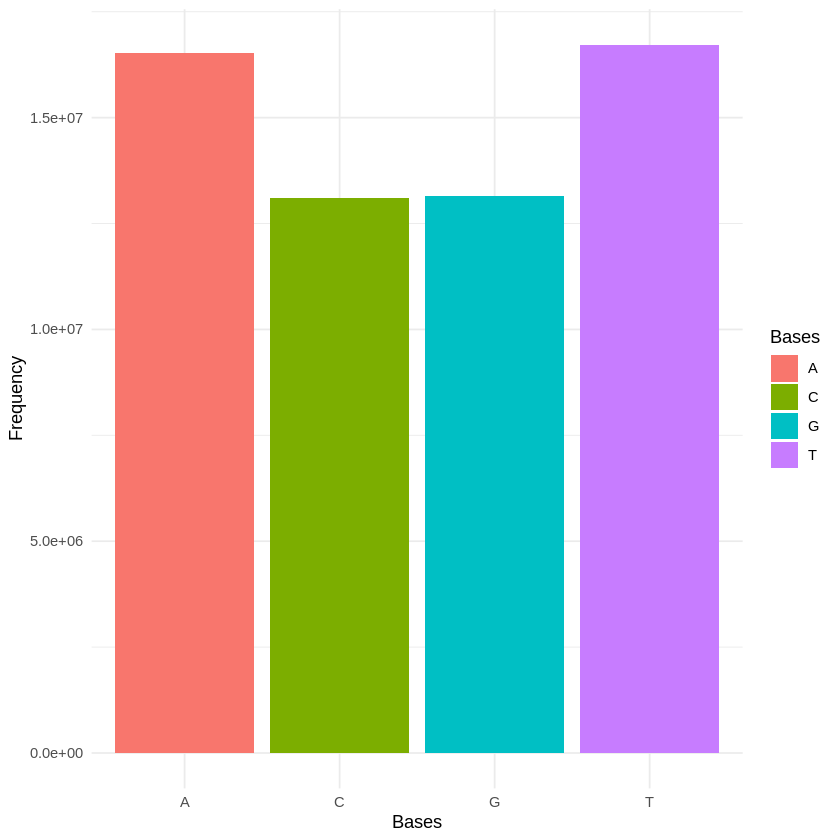

In [10]:

library(ggplot2)
alpFreq <-alphabetFrequency(BSgenome.Hsapiens.UCSC.hg19$chr20)
atcgFreq <- alpFreq[c("A","T","C","G")]
atcgFreqDF <- data.frame(Bases=names(atcgFreq),Frequency=atcgFreq)
ggplot(atcgFreqDF,aes(y=Frequency,x=Bases,fill=Bases))+geom_bar(stat = "identity")+theme_minimal()

Extrae la secuencia de nucleótidos desde la posición 1,000,000 hasta la 1,000,020 en el cromosoma 20, Luego asignamos una secuencia complementaria.

In [11]:
mySeq <- BSgenome.Hsapiens.UCSC.hg19$chr20[1000000:1000020]#seq de una ragno dentro del cromosoma 20
print(mySeq)
complement(mySeq) #mostramos el complemento de la secuencia.

21-letter DNAString object
seq: GTGGGAGAGAACTGGAACAAG


21-letter DNAString object
seq: CACCCTCTCTTGACCTTGTTC

Extrae la secuencia de nucleótidos desde la posición 6,643,976 hasta la 6,644,027 en el cromosoma 12,busca el patrón "ATG" dentro de la secuencia proporcionada y devuelve cuantas veces se repite esta.

In [27]:
gapdhSeq <- BSgenome.Hsapiens.UCSC.hg19$chr12[6643976:6644027]
print(gapdhSeq)
countPattern("ATG",gapdhSeq)

52-letter DNAString object
seq: CCGAGCCACATCGCTCAGACACCATGGGGAAGGTGAAGGTCGGAGTCAACGG


[1] 1

In [13]:
sequence_names <- seqnames(BSgenome.Hsapiens.UCSC.hg19)
print(sequence_names)

  [1] "chr1"                  "chr2"                  "chr3"                 
  [4] "chr4"                  "chr5"                  "chr6"                 
  [7] "chr7"                  "chr8"                  "chr9"                 
 [10] "chr10"                 "chr11"                 "chr12"                
 [13] "chr13"                 "chr14"                 "chr15"                
 [16] "chr16"                 "chr17"                 "chr18"                
 [19] "chr19"                 "chr20"                 "chr21"                
 [22] "chr22"                 "chrX"                  "chrY"                 
 [25] "chrM"                  "chrMT"                 "chr4_ctg9_hap1"       
 [28] "chr6_apd_hap1"         "chr6_cox_hap2"         "chr6_dbb_hap3"        
 [31] "chr6_mann_hap4"        "chr6_mcf_hap5"         "chr6_qbl_hap6"        
 [34] "chr6_ssto_hap7"        "chr17_ctg5_hap1"       "chr1_gl000191_random" 
 [37] "chr1_gl000192_random"  "chr4_gl000193_random"  "chr4_gl00

In [23]:
sequence_len <- seqlengths(BSgenome.Hsapiens.UCSC.hg19)
print(sequence_len)

                 chr1                  chr2                  chr3 
            249250621             243199373             198022430 
                 chr4                  chr5                  chr6 
            191154276             180915260             171115067 
                 chr7                  chr8                  chr9 
            159138663             146364022             141213431 
                chr10                 chr11                 chr12 
            135534747             135006516             133851895 
                chr13                 chr14                 chr15 
            115169878             107349540             102531392 
                chr16                 chr17                 chr18 
             90354753              81195210              78077248 
                chr19                 chr20                 chr21 
             59128983              63025520              48129895 
                chr22                  chrX                  c

In [14]:
sequence_lengths <- seqlengths(BSgenome.Hsapiens.UCSC.hg19)

seq_data <- data.frame(
  Sequence = sequence_names,
  Length = sequence_lengths
)

Graficamos las longitudes de las 100 secuencias más largas del genoma Hsapiens.UCSC.hg19. Las secuencias estarán ordenadas de mayor a menor longitud, y cada barra representará la longitud de una secuencia en pares de bases (bp)

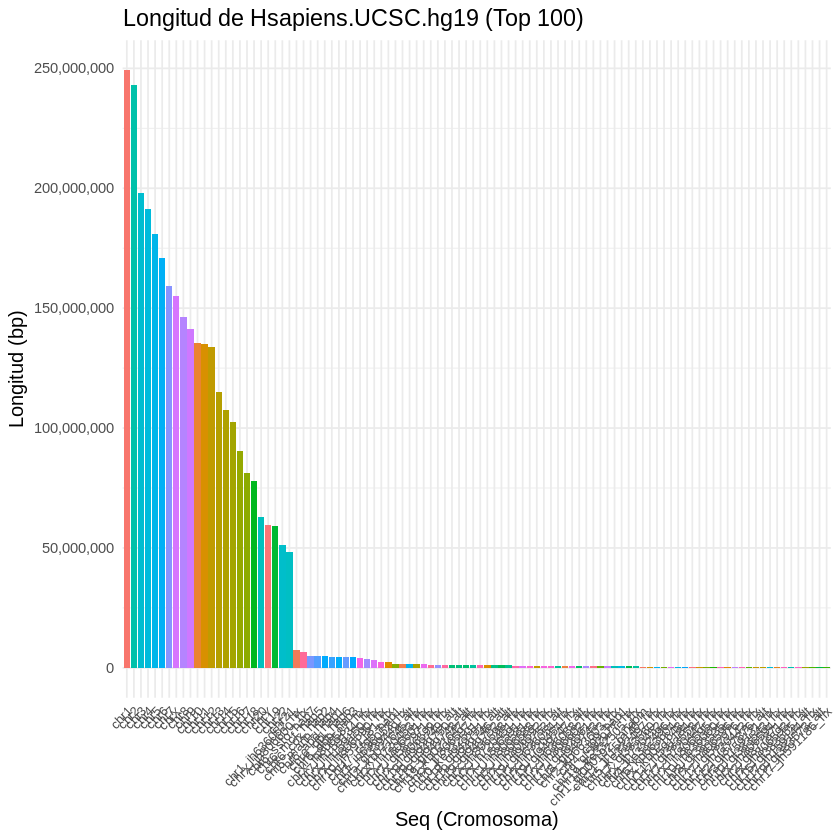

In [28]:
seq_data <- seq_data[order(seq_data$Length, decreasing = TRUE), ]

seq_data <- seq_data[1:100, ] # solo las primeras 100

ggplot(seq_data, aes(x = reorder(Sequence, -Length), y = Length, fill = Sequence)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Longitud de Hsapiens.UCSC.hg19 (Top 100)",
       x = "Seq (Cromosoma)",
       y = "Longitud (bp)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 8),
        plot.title = element_text(size = 14),
        axis.title = element_text(size = 12),
        legend.position = "none") +
  scale_y_continuous(labels = scales::comma)